In [51]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def logistic_growth(t,K,P0,r):
    return K / (1 + ((K - P0) / P0)* np.exp(-r * t))

years = pd.read_csv('data.csv')['Year']
population_data = pd.read_csv('data.csv')['Population']
growth_rate_data = pd.read_csv('data.csv')['Growth Rate']

growth_rate_data = [rate / 100 for rate in growth_rate_data]
time_data = [year - 1950 for year in years]

params, covariance = curve_fit(logistic_growth, time_data, population_data)
K_est, P0_est, r_est = params

In [52]:
import pandas as pd
pd.read_csv('data.csv')['Population']

0     3935000
1     3863000
2     3791000
3     3720000
4     3652000
       ...   
69     236000
70     224000
71     213000
72     203000
73     193000
Name: Population, Length: 74, dtype: int64

In [53]:
print("Estimated Parameters:")

Estimated Parameters:


In [76]:
print("Estimated Parameters:")
print("K (Carrying Capacity):", K_est)
print("P0 (Initial Population):", P0_est)
print("r (Growth Rate):", r_est)

Estimated Parameters:
K (Carrying Capacity): 6109983
P0 (Initial Population): 193000
r (Growth Rate): 0.0783


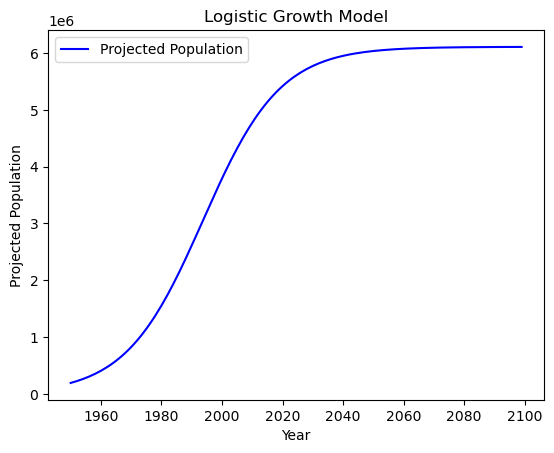

In [77]:
years = range(1950,2100)
projected_population = [logistic_growth(year - 1950, K_est, P0_est, r_est) for year in years]

plt.plot(years, projected_population, label='Projected Population', color='blue')
plt.title('Logistic Growth Model')
plt.xlabel('Year')
plt.ylabel('Projected Population')
plt.legend()
plt.show()